# Supervised Learning using KNN Classification algorithm with a5a dataset

**20-Dec-2019**

**TBRUEJ**

**ALHAYAJ MOHAMMED JAMAL HADI**


**a5a Dataset link** https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a5a

In [1]:
# importing libraries 
import numpy as np
import pandas as pd


import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import seaborn as sns


In [3]:
# read csv file
data = pd.read_csv("csvDatasets.csv")
print(len(data))
data.head()

6414


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Unnamed: 15
0,-1,3,11,14,19,39,42,55,64,67,73,75,76.0,80.0,83.0,NaN
1,-1,3,6,17,22,36,41,53,64,67,73,74,76.0,80.0,83.0,NaN
2,1,3,6,18,20,37,40,51,63,71,73,74,76.0,82.0,83.0,NaN
3,-1,3,6,17,27,35,40,57,63,69,73,74,76.0,81.0,103.0,NaN
4,-1,1,7,16,22,36,42,56,62,67,73,74,76.0,79.0,83.0,NaN


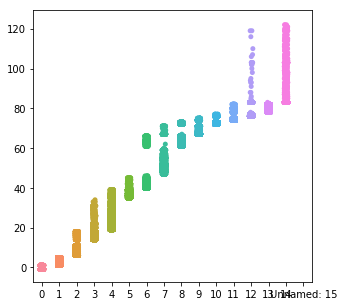

In [4]:
# visualize original dataset
plt.figure(figsize = (5, 5))
sns.stripplot(data=data)

In [5]:
# In original data, there is some missing column number.
# below code replace any zeros and NaN with the Mean values of the column with skipping column nan values

#Replace zeros 
zero_not_accepted = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

for column in zero_not_accepted:
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean)

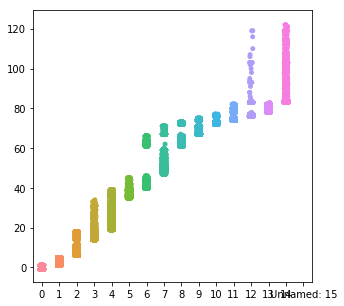

In [6]:
# visualizing data after replacing NaN with the Mean values
plt.figure(figsize = (5, 5))
sns.stripplot(data=data)

In [7]:
# split data
# x = loop through all rows, columns starting from index 1 to 14
x = data.iloc[:, 1:14]

#y = loop through all rows, for only first column with index 0
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2) 
# test_size means put 20% of the data away, will test it later

In [8]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/mohammed/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mohammed/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/mohammed/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [29]:
import math
# help to select k
k_help = math.sqrt(len(y_test))

# n_neighbors : k
# p = 2       : I have 2 classes in dataset, p is a power parameter to define metric
# metric      : use euclidean distance equation to calculate points   

classifier = KNeighborsClassifier(n_neighbors=35, p=2, metric='euclidean')
print(classifier.fit(X_train, y_train))
print(k_help)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=35, p=2,
           weights='uniform')
35.8189893771


In [43]:
# Predict the test set results
y_pred = classifier.predict(X_test)
print("y_test length")
print(len(y_test))

print("y_pred length")
print(len(y_pred))

print(y_pred)

y_test length
1283
y_pred length
1283
[-1 -1 -1 ...  1 -1  1]


In [48]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[906  63]
 [168 146]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.93      0.89       969
           1       0.70      0.46      0.56       314

   micro avg       0.82      0.82      0.82      1283
   macro avg       0.77      0.70      0.72      1283
weighted avg       0.81      0.82      0.81      1283



In [50]:
print(f1_score(y_test, y_pred))

0.5583173996175909


In [46]:
print(accuracy_score(y_test, y_pred))

0.8199532346063912


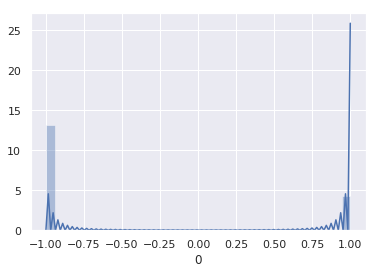

In [14]:
sns.set(style = 'darkgrid')
sns.distplot(y_test)

[-1 -1 -1 ...  1 -1  1]


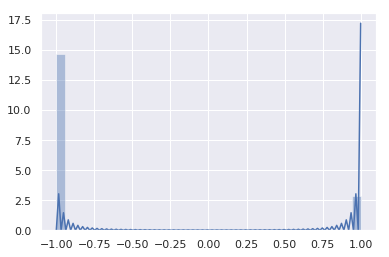

In [15]:
sns.distplot(y_pred)
print(y_pred)